In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

## Load pre-shuffled MNIST data into train and test sets


The cell below loads the MNIST database of handwritten digits (which comprises of a development set of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images). load_data() function of mnist class returns two tuples (x_train, y_train) and (x_test, y_test), where <br>
x_train | x_test  : uint8 array of grayscale image data with shape (60000, 28, 28) | (10000, 28, 28) respectively <br>
y_train | y_test : uint8 array of digit labels (integers in range 0-9) with shape (60000,) | (10000,) respectively <br>

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [60]:
# load and summarize the MNIST dataset
#from keras.datasets import mnist
# load dataset
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# summarize dataset shape
print('Train', X_train.shape, y_train.shape)
print('Test', (X_test.shape, y_test.shape))
# summarize pixel values
print('Train', X_train.min(), y_train.max(), X_train.mean(), y_train.std())
print('Test', X_test.min(), y_test.max(), y_test.mean(), y_test.std())

Train (60000, 28, 28) (60000,)
Test ((10000, 28, 28), (10000,))
Train 0 9 33.318421449829934 2.889246360020012
Test 0 9 4.4434 2.8957203663337383


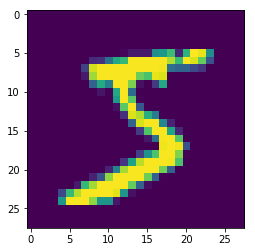

In [61]:
#print(type(X_train))
from matplotlib import pyplot as plt
%matplotlib inline
#print(X_train.show)
plt.imshow(X_train[0])

In [0]:
# Reshaping the images from 28x28 to 28x28x1, thus making the shape of the array contain channel information

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Converting integer labels into one-hot encodings as to make the label dimension same as the number of output neurons (needed to apply cross-entropy loss as the latter works on probability distributions)
# Convert 1-dimensional class arrays to 10-dimensional class matrices

y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [65]:
Y_train[:10] # Prints one hot label values of first 10 images

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
#create normalised images in the dataset for train  


# create and configure the data generator


# calculate scaling statistics on the training dataset


# get batch iterator
#train_iterator = datagen.flow(X_train,y_train,batch_size=32 )#epochs=32) # train features, train labels, batch size, number of epochs for training ,  # validation_data = (test_features, test_labels), verbose=1)

                    #steps_per_epoch=len(x_train) / 32,)


# plot model history
#plot_model_history(model_info)

# get batch iterator for training
#train_iterator = datagen.flow(X_train, y_train)
# get batch iterator for validation
#val_iterator = datagen.flow(valX, valy)
# fit model

#model.fit_generator(train_iterator, validation_data=val_iterator)

#model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    #steps_per_epoch=len(x_train) / 32, epochs=e)

In [66]:
#create normalised images in the dataset 

#Image norm , first method 


# example of standardizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(trainX)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())
# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())



Statistics train=33.318 (78.567), test=33.791 (79.172)
Data Generator mean=33.318, std=78.567
(64, 28, 28, 1) -0.01404862 0.98445976
(60000, 28, 28, 1) -3.4560264e-07 0.9999998


In [67]:
from keras import regularizers
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1),kernel_regularizer=regularizers.l2(0.001))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3 ,kernel_regularizer=regularizers.l2(0.001))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1 ,kernel_regularizer=regularizers.l2(0.001))) #22
model.add(Activation('relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3 ,kernel_regularizer=regularizers.l2(0.001)))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,kernel_regularizer=regularizers.l2(0.001)))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,kernel_regularizer=regularizers.l2(0.001)))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,kernel_regularizer=regularizers.l2(0.001)))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4,kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), kernel_regularizer=<keras.reg...)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regula

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_29 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_33 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_30 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_34 (Activation)   (None, 24, 24, 32)        0         
__________

In [71]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128), steps_per_epoch = len(X_train)/128, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

#model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Instructions for updating:
Use tf.cast instead.
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/468 [==============================] - 11s 24ms/step - loss: 0.6159 - acc: 0.8577 - val_loss: 0.4160 - val_acc: 0.9387
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/468 [==============================] - 7s 15ms/step - loss: 0.3136 - acc: 0.9254 - val_loss: 0.1440 - val_acc: 0.9856
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/468 [==============================] - 7s 15ms/step - loss: 0.2518 - acc: 0.9378 - val_loss: 0.1103 - val_acc: 0.9861
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
469/468 [==============================] - 7s 15ms/step - loss: 0.2165 - acc: 0.9451 - val_loss: 0.0971 - val_acc: 0.9859
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
469/468 [==============================]

In [72]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03659564380645752, 0.994]


In [0]:
model.save("/content/drive/My Drive/mnist-model.h5")

In [0]:
# mount drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive"

In [0]:
#load model 


from keras.models import load_model
model = load_model('/content/drive/My Drive/mnist-model.h5')


Instructions for updating:
Use tf.cast instead.


In [0]:
ypred = model.predict(X_test)

In [76]:
argmaxout=np.argmax(ypred,axis=1)
print(argmaxout)

[7 2 1 ... 4 5 6]


In [77]:
print(y_test)
y_test.shape


[7 2 1 ... 4 5 6]


(10000,)

In [78]:
#Find out 25 misclassified images from the validation dataset and create an image gallery

result = np.absolute(argmaxout-y_test)
print(result.shape)

miss_img =[] 
np.nonzero(result)



(10000,)


(array([ 193,  321,  359,  449,  582,  646,  659,  947, 1014, 1107, 1226,
        1232, 1247, 1299, 1621, 1878, 1901, 2040, 2130, 2135, 2182, 2293,
        2308, 2414, 2454, 2462, 2597, 2607, 2654, 2939, 3060, 3225, 3422,
        3448, 3767, 3850, 4201, 4284, 4699, 4740, 4761, 4823, 4860, 5937,
        6571, 6576, 6597, 6625, 6651, 6847, 7233, 8408, 8527, 9009, 9015,
        9642, 9692, 9729, 9839, 9850]),)

In [0]:
#print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline


plt.imshow(X_test[445])

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread(X_test[445])
imgplot = plt.imshow(img)
plt.show()

In [0]:
# create a grid of 5x5 images
from matplotlib import pyplot

for i in range(0, 24):
	pyplot.subplot(221 + 1 + i)
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=False)

datagen.fit(X_train)

iterator = datagen.flow(X_train, Y_train,batch_size =32) # ,epochs =32)

# fits the model on batches with real-time data augmentation:
#model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
#                    steps_per_epoch=len(x_train) / 32, epochs=epochs)
model.fit(iterator,epochs=32,steps_per_epoch=len(X_train) / 32)